<a href="https://colab.research.google.com/github/Light047/LangChain/blob/main/NeuNet_by_ME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Neuron_code/Introduction #
inputs = [1, 2, 3, 2.5] # features from a single sample / describes current status of the this server at the single point in time.
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5
output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1, inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2, inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]

print(output)

[4.8, 1.21, 2.385]


In [ ]:
# Coding_a_Layer #
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
layers_output = [] #output of current layer.
for neuron_weights, neuron_bias in zip(weights, biases): # //inputs*weights + bias//
  neuron_output = 0 #output of given neuron
  for n_inputs, weight in zip(inputs, neuron_weights): # //inputs*weights//
    neuron_output += n_inputs*weight
  neuron_output += neuron_bias
  layers_output.append(neuron_output)
print(layers_output)


[4.8, 1.21, 2.385]


In [ ]:
# the_Dot_Product_via_NumPy #
import numpy as np
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
output = np.dot(weights, inputs) + biases
print(output)

[4.8   1.21  2.385]


In [ ]:
# Batches/Layers
# Batches allows generalisation[i.e. having batch of samples for features].
# Fitment of node become more efficient[as node try to fit-in more than one sample at a time]{Learning Rate increases too.}
# Batch size = 32 is most common
import numpy as np
inputs = [[1, 2, 3, 2.5], [2.0, 5.0, -1.0, 2.0], [-1.5, 2.7, 3.3, -0.8]] #Batching
weights = [[0.2, 0.8, -0.5, 1.0], [0.5, -0.91, 0.26, -0.5], [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
weights2 = [[0.1, -0.14, 0.5], [-0.5, 0.12, -0.33], [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]
layer1_output = np.dot(inputs, np.array(weights).T) + biases # Transpose of an array || numpy.array(Arr).T
layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2  # Layering |layer1| -> |layer2|
print(layer2_output)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [ ]:
#Object_layers
import numpy as np
np.random.seed(0) # The random number generator produces the same sequence of random numbers each time you run the code.
X = [[1, 2, 3, 2.5], [2.0, 5.0, -1.0, 2.0], [-1.5, 2.7, 3.3, -0.8]] # 3 samples
class Layer_Dense :
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.1*np.random.randn(n_inputs, n_neurons) # To generate random weights (sample_size, number_of_node)/Gaussian distribution bounded around zero.
    self.biases = np.zeros((1, n_neurons)) # Actual_shape pass as a parameter(so TUPLE of shape) while above parameters are the shape.
  def forward(self, inputs): #The forward() method defines how the input data flows through these layers.
    self.output = np.dot(inputs, self.weights) + self.biases
## Hidden_Layer_Activation_Function ##
#F(3) : Rectified Linear Unit [ReLU(x) : { x, x=0 : 0, x<0 }]
class Activation_Functions :
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(4, 5)
activefunction= Activation_Functions()
layer2 = Layer_Dense(5, 2)
ax
layer1.forward(X)
#print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)
# Now we have control over shapes of Weights we don't really need to transpose.

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


Here are random generated datasets


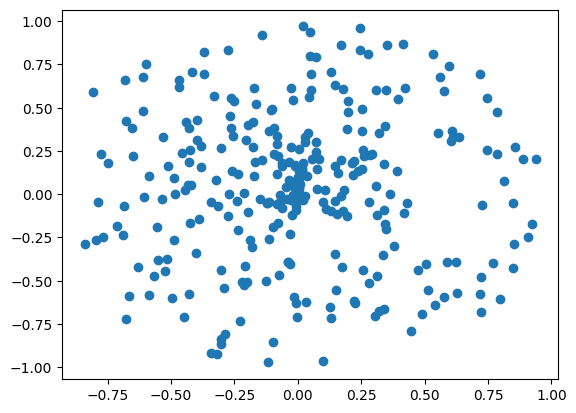

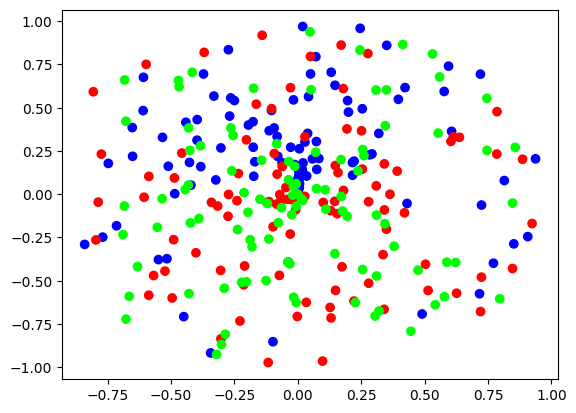

In [ ]:
#Creating_dataset(random)
import numpy as np
np.random.seed(0)
def create_data(points, classes):
  X = np.zeros((points*classes, 2)) #data_matrix {2 is dimensionality here}
  y = np.zeros(points*classes, dtype='uint8') #class_labels
  for class_number in range(classes):
    ix = range(points*class_number, points*(class_number+1))
    r = np.linspace(0.0, 1, points) #radius
    t = np.linspace(class_number*4, (class_number+1)*4, points) * np.random.randn(points)*0.2 #theota
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = class_number
  return X, y
print('Here are random generated datasets')
X, y = create_data(100, 3)
#lets_visualize it.
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()
plt.scatter(X[:, 0], X[:, 1], c=y , cmap='brg')
plt.show()

In [22]:
#Object_layers/Dataset/Activation_function
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0) # The random number generator produces the same sequence of random numbers each time you run the code.

def create_data(points, classes): #creating_dataset
  X = np.zeros((points*classes, 2)) #data_matrix {2 is dimensionality here}
  y = np.zeros(points*classes, dtype='uint8') #class_labels
  for class_number in range(classes):
    ix = range(points*class_number, points*(class_number+1))
    r = np.linspace(0.0, 1, points) #radius
    t = np.linspace(class_number*4, (class_number+1)*4, points) * np.random.randn(points)*0.2 #theota
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = class_number
  return X, y
print('Here')
X, y = create_data(100, 3)

class Layer_Dense : #constructor for y = W.X + b ; methods for activation function.
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.1*np.random.randn(n_inputs, n_neurons) # To generate random weights (sample_size, number_of_node)/Gaussian distribution bounded around zero.
    self.biases = np.zeros((1, n_neurons)) # Actual_shape pass as a parameter(so TUPLE of shape) while above parameters are the shape.
  def forward(self, inputs): #The forward() method defines how the input data flows through these layers.
    self.output = np.dot(inputs, self.weights) + self.biases
## Hidden_Layer_Activation_Function ##

#F(3) : Rectified Linear Unit [ReLU(x) : { x, x=0 : 0, x<0 }]
class Activation_ReLU :
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)
class Activation_Softmax : #F(4) SOFTMAX func. --> e^x/(sigma(e^x))
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) #exponentiate the inputs and stoppng overflow { v - max(v)}
    probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True) #normalisation of inputs /keepdims to Transpose
    self.output = probabilities
## Calculating_loss
class Loss :
  def calculate(self, output, y):
    sample_losses = self.forward(output, y) # this will use L_CCE (vector of values) to calculate
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentrophy(Loss):
  def forward(self, y_pred, y_true):
    sample = len(y_pred) #sample size
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) #clipping the values so that log don;t give negative value
    if len(y_true.shape) == 1 : #if user pass scalar value
      correct_confidences = y_pred_clipped[range(sample), y_true]
    elif len(y_true.shape) == 2 : #if user pass one hot code
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods #vector of values,


dense1 = Layer_Dense(X.shape[1], 3)
activation1= Activation_ReLU()

dense2 = Layer_Dense(3, 4)
activation2= Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
print('Result via ReLU')

print(activation1.output[:3])

dense2.forward(activation1.output)

activation2.forward(dense2.output)
print('Result via softmax')
print(activation2.output[:3]) #see probability distribution 1/4th as we took 4
loss_function = Loss_CategoricalCrossentrophy()
loss = loss_function.calculate(activation2.output, y)
print(f'Loss = {loss}')







Here
Result via ReLU
[[0.         0.         0.        ]
 [0.         0.00068663 0.        ]
 [0.         0.00147761 0.        ]]
Result via softmax
[[0.25       0.25       0.25       0.25      ]
 [0.25000162 0.25002242 0.24998458 0.24999138]
 [0.2500035  0.25004825 0.24996681 0.24998144]]
Loss = 1.385788121466941


In [ ]:
# Now, optimizing Activation function ->
# ReLU(x) is good but it always ignore negative values whether it is large or small.
# this condradiction our desired prediction (can't always ignore negative values)
# so SOFTMAX func. --> e^x/(sigma(e^x))
import numpy as np
layer_outputs = [[4.8, 1.21, 2.385], [8.9, 1.81, -0.2], [1.41, 1.051, 0.026]]
exp_values = np.exp(layer_outputs)
print(np.sum(layers_outputs, axis=1, keepdims=True))
norm_values = exp_values/np.sum(exp_values, axis=1, keepdims=True)


[[ 8.395]
 [10.51 ]
 [ 2.487]]


In [11]:
import math
softmax_output = [0.9, 0.5, 0.1]
target_output = [0, 0, 1]
loss = -(math.log(softmax_output[0])*target_output[0] + math.log(softmax_output[1])*target_output[1] +math.log(softmax_output[2])*target_output[2])
print(loss)
print(-math.log(0.5))



2.3025850929940455
0.6931471805599453


In [28]:
#implementing Loss
import numpy as np

softmax_output = [[0.7, 0.1, 0.2], [0.1, 0.5, 0.4], [0.02, 0.9, 0.08]]
class_target = [0, 1, 1] #y_true
for target_index, distribution in zip(class_target, softmax_output) :
  print(distribution[target_index])

softmax_output2 = np.array([[0.7, 0.1, 0.2], [0.1, 0.5, 0.4], [0.02, 0.9, 0.08]]) #y_pred_clipped
print(softmax_output2[[0, 1, 1], class_target]) #gives vector
#printing CCE_LOSS

neg_log = -np.log(softmax_output2[np.arange(len(softmax_output2)), class_target])
print(f'negative_log = {neg_log}')
avg_loss = np.mean(neg_log)
print(avg_loss)
# implementing accuracy
predictions = np.argmax(softmax_output2, axis=1)
accuracy = np.mean(predictions == class_target)
print(f'accuracy = {accuracy}')







0.7
0.5
0.9
[0.7 0.5 0.5]
negative_log = [0.35667494 0.69314718 0.10536052]
0.38506088005216804
accuracy = 1.0


Optimizing the Network--
we are focusing on the impact of weights and biases on loss function and try to optimize loss.
1. Random generation : using random.randn() to generate random samples and tweaking the best random generated o/p. to minimise the loss.
 1.1 : problem arise , to much work to do, and also it hits local minima . for best optimization we need a global one.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0) # The random number generator produces the same sequence of random numbers each time you run the code.

def create_data(points, classes): #creating_dataset
  X = np.zeros((points*classes, 2)) #data_matrix {2 is dimensionality here}
  y = np.zeros(points*classes, dtype='uint8') #class_labels
  for class_number in range(classes):
    ix = range(points*class_number, points*(class_number+1))
    r = np.linspace(0.0, 1, points) #radius
    t = np.linspace(class_number*4, (class_number+1)*4, points) * np.random.randn(points)*0.2 #theota
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = class_number
  return X, y
print('Here')
X, y = create_data(1000, 3)

class Layer_Dense : #constructor for y = W.X + b ; methods for activation function.
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.1*np.random.randn(n_inputs, n_neurons) # To generate random weights (sample_size, number_of_node)/Gaussian distribution bounded around zero.
    self.biases = np.zeros((1, n_neurons)) # Actual_shape pass as a parameter(so TUPLE of shape) while above parameters are the shape.
  def forward(self, inputs): #The forward() method defines how the input data flows through these layers.
    self.output = np.dot(inputs, self.weights) + self.biases
## Hidden_Layer_Activation_Function ##

#F(3) : Rectified Linear Unit [ReLU(x) : { x, x=0 : 0, x<0 }]
class Activation_ReLU :
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)
class Activation_Softmax : #F(4) SOFTMAX func. --> e^x/(sigma(e^x))
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) #exponentiate the inputs and stoppng overflow { v - max(v)}
    probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True) #normalisation of inputs /keepdims to Transpose
    self.output = probabilities
## Calculating_loss
class Loss :
  def calculate(self, output, y):
    sample_losses = self.forward(output, y) # this will use L_CCE (vector of values) to calculate
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentrophy(Loss):
  def forward(self, y_pred, y_true):
    sample = len(y_pred) #sample size
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7) #clipping the values so that log don;t give negative value
    if len(y_true.shape) == 1 : #if user pass scalar value
      correct_confidences = y_pred_clipped[range(sample), y_true]
    elif len(y_true.shape) == 2 : #if user pass one hot code
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods #vector of values,

#__LAYERS__#

dense1 = Layer_Dense(X.shape[1], 3)
activation1= Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2= Activation_Softmax()

loss_function = Loss_CategoricalCrossentrophy()
lowest_loss = 999999 #we are using linear lines to trace the samples and that's why loss in not decreasing at larger scale ..
best_dense_layer1_weights = dense1.weights.copy()
best_dense_layer1_biases = dense1.biases.copy()
best_dense_layer2_weights = dense1.weights.copy()
best_dense_layer2_biases = dense1.biases.copy()
for iteration in range(10000):
  dense1.weights += 0.05 * np.random.randn(X.shape[1],3)
  dense1.biases += 0.05 * np.random.randn(1,3)
  dense2.weights += 0.05 * np.random.randn(dense2.weights.shape[0], dense2.weights.shape[1])
  dense2.biases += 0.05 * np.random.randn(1,3)

  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  loss = loss_function.calculate(activation2.output, y)

  predictions = np.argmax(activation2.output, axis=1)
  accuracy = np.mean(predictions==y)

  if loss < lowest_loss:
    print('New set of iteration of weights found, iteration:', iteration, 'loss:', loss, 'accuracy:', accuracy)
    best_dense_layer1_weights = dense1.weights.copy()
    best_dense_layer1_biases = dense1.biases.copy()
    best_dense_layer2_weights = dense1.weights.copy()
    best_dense_layer2_biases = dense1.biases.copy()
    lowest_loss = loss
  else:
    best_dense_layer1_weights = dense1.weights.copy()
    best_dense_layer1_biases = dense1.biases.copy()
    best_dense_layer2_weights = dense1.weights.copy()
    best_dense_layer2_biases = dense1.biases.copy()



Here
New set of iteration of weights found, iteration: 0 loss: 1.0997569070677877 accuracy: 0.3333333333333333
New set of iteration of weights found, iteration: 1 loss: 1.0991146483472096 accuracy: 0.3243333333333333
New set of iteration of weights found, iteration: 112 loss: 1.0984042214485414 accuracy: 0.3233333333333333
New set of iteration of weights found, iteration: 113 loss: 1.0977013938826299 accuracy: 0.329
New set of iteration of weights found, iteration: 114 loss: 1.0961296353801755 accuracy: 0.334
New set of iteration of weights found, iteration: 115 loss: 1.0946632790506188 accuracy: 0.342
New set of iteration of weights found, iteration: 116 loss: 1.0930459319618169 accuracy: 0.34833333333333333
New set of iteration of weights found, iteration: 131 loss: 1.0908782680003373 accuracy: 0.35833333333333334
